In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel(r'Buys_Computer_CSV.xlsx')
df

,age,income,student,credit_rating,buys_computer
0,< = 30,high,no,fair,no
1,< = 30,high,no,excellent,no
2,31 ... 40,high,no,fair,yes
3,> 40,medium,no,fair,yes
4,> 40,low,yes,fair,yes
5,> 40,low,yes,excellent,no
6,31 ... 40,low,yes,excellent,yes
7,< = 30,medium,no,fair,no
8,< = 30,low,yes,fair,yes
9,> 40,medium,yes,fair,yes


## One Hot Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
encoder = OneHotEncoder()

In [8]:
encoded_df = pd.get_dummies(df)

In [9]:
encoded_df

,age_31 ... 40,age_< = 30,age_> 40,income_high,income_low,income_medium,student_no,student_yes,credit_rating_excellent,credit_rating_fair,buys_computer_no,buys_computer_yes
0,False,True,False,True,False,False,True,False,False,True,True,False
1,False,True,False,True,False,False,True,False,True,False,True,False
2,True,False,False,True,False,False,True,False,False,True,False,True
3,False,False,True,False,False,True,True,False,False,True,False,True
4,False,False,True,False,True,False,False,True,False,True,False,True
5,False,False,True,False,True,False,False,True,True,False,True,False
6,True,False,False,False,True,False,False,True,True,False,False,True
7,False,True,False,False,False,True,True,False,False,True,True,False
8,False,True,False,False,True,False,False,True,False,True,False,True
9,False,False,True,False,False,True,False,True,False,True,False,True


In [10]:
encoded_df = encoded_df.astype(int)

In [11]:
encoded_df

,age_31 ... 40,age_< = 30,age_> 40,income_high,income_low,income_medium,student_no,student_yes,credit_rating_excellent,credit_rating_fair,buys_computer_no,buys_computer_yes
0,0,1,0,1,0,0,1,0,0,1,1,0
1,0,1,0,1,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,1
3,0,0,1,0,0,1,1,0,0,1,0,1
4,0,0,1,0,1,0,0,1,0,1,0,1
5,0,0,1,0,1,0,0,1,1,0,1,0
6,1,0,0,0,1,0,0,1,1,0,0,1
7,0,1,0,0,0,1,1,0,0,1,1,0
8,0,1,0,0,1,0,0,1,0,1,0,1
9,0,0,1,0,0,1,0,1,0,1,0,1


## A2

Create a Decision Tree for the above data. Get the depth of the constructed tree.

In [12]:
from sklearn.model_selection import train_test_split

In [22]:
X = encoded_df.drop(['buys_computer_yes'], axis=1)  
y = encoded_df['buys_computer_yes']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
pred=dtree.predict(X_test)

In [29]:
print(dtree.get_depth())

1


## A3

Visualize the constructed tree with plot_tree() command. Following code snippet for help.

In [41]:
from sklearn.tree import plot_tree

In [42]:
plt.figure(figsize=(70,20))

<Figure size 7000x2000 with 0 Axes>

<Figure size 7000x2000 with 0 Axes>

[Text(0.5, 0.75, 'x[10] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

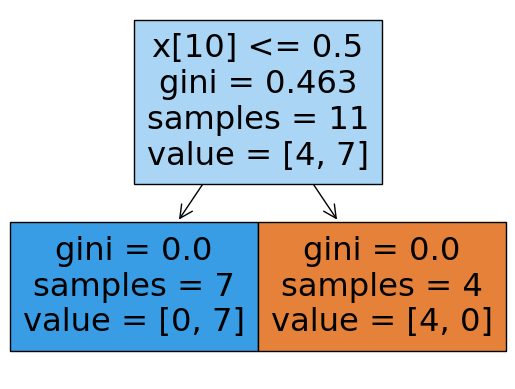

In [44]:
plot_tree(dtree, filled=True)

## A4

Create a Decision Tree classifier on your project data. Study the accuracy for training and test 
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code 
for help

In [45]:
df1 = pd.read_excel(r'embeddingsdata - Copy.xlsx')
df1

,Label,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,...,-0.045697,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309
1,0,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,...,-0.056834,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062
2,0,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,...,-0.016249,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289
3,0,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,...,-0.038879,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540
4,0,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,...,-0.042079,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,...,-0.040456,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791
896,0,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,...,-0.026985,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444
897,2,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,...,-0.041547,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324
898,5,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,...,-0.057920,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415


In [46]:
model = DecisionTreeClassifier()

In [52]:
df1.columns[1:]

Index(['embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4', 'embed_5',
       'embed_6', 'embed_7', 'embed_8', 'embed_9',
       ...
       'embed_758', 'embed_759', 'embed_760', 'embed_761', 'embed_762',
       'embed_763', 'embed_764', 'embed_765', 'embed_766', 'embed_767'],
      dtype='object', length=768)

X = df1[df1.columns[1:]]
y = df1['Label']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
model.score(X_train,y_train)

0.9972222222222222

In [63]:
model.score(X_test,y_test)

0.4222222222222222

## A5

Impose a max_depth constraint on the tree construction. Construct the tree again and check the accuracies. Visualize the tree constructed with max_depth constraint

In [65]:
model = DecisionTreeClassifier(max_depth=5)

In [68]:
X = df1[df1.columns[1:]]
y = df1['Label']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [71]:
plt.figure(figsize=(70,20))

<Figure size 7000x2000 with 0 Axes>

<Figure size 7000x2000 with 0 Axes>

[Text(0.5882352941176471, 0.9166666666666666, 'x[82] <= 0.011\ngini = 0.737\nsamples = 720\nvalue = [295, 194, 84, 7, 15, 53, 32, 5, 9, 18, 8]'),
 Text(0.3137254901960784, 0.75, 'x[495] <= -0.062\ngini = 0.673\nsamples = 296\nvalue = [69, 150, 30, 5, 5, 18, 8, 3, 2, 4, 2]'),
 Text(0.1568627450980392, 0.5833333333333334, 'x[678] <= -0.003\ngini = 0.783\nsamples = 109\nvalue = [39, 22, 21, 1, 5, 6, 7, 1, 1, 4, 2]'),
 Text(0.0784313725490196, 0.4166666666666667, 'x[568] <= 0.026\ngini = 0.81\nsamples = 83\nvalue = [19, 20, 21, 1, 5, 3, 7, 1, 0, 4, 2]'),
 Text(0.0392156862745098, 0.25, 'x[527] <= 0.03\ngini = 0.562\nsamples = 26\nvalue = [1, 16, 6, 1, 0, 0, 1, 0, 0, 1, 0]'),
 Text(0.0196078431372549, 0.08333333333333333, 'gini = 0.227\nsamples = 16\nvalue = [1, 14, 0, 0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.58\nsamples = 10\nvalue = [0, 2, 6, 1, 0, 0, 0, 0, 0, 1, 0]'),
 Text(0.11764705882352941, 0.25, 'x[122] <= -0.097\ngini = 0.8\nsamples = 57

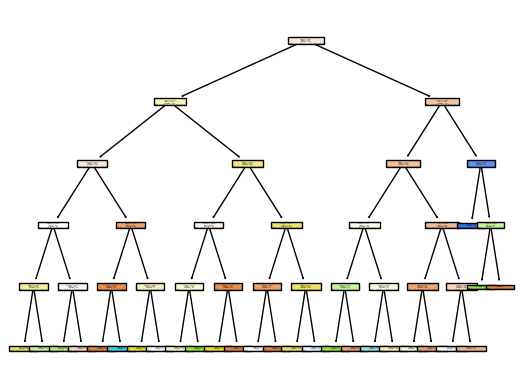

In [72]:
plot_tree(model, filled=True)

## A6

Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study the model & graph.

In [75]:
X = df1[df1.columns[1:]]
y = df1['Label']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model = DecisionTreeClassifier(criterion="entropy")

In [79]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
plt.figure(figsize=(70,20))

<Figure size 7000x2000 with 0 Axes>

<Figure size 7000x2000 with 0 Axes>

[Text(0.6374092487373737, 0.9583333333333334, 'x[56] <= -0.014\nentropy = 2.391\nsamples = 720\nvalue = [295, 194, 84, 7, 15, 53, 32, 5, 9, 18, 8]'),
 Text(0.46358112373737376, 0.875, 'x[271] <= 0.029\nentropy = 2.293\nsamples = 447\nvalue = [226, 53, 62, 4, 13, 40, 28, 1, 9, 11, 0]'),
 Text(0.32615214646464646, 0.7916666666666666, 'x[437] <= 0.02\nentropy = 2.167\nsamples = 399\nvalue = [213, 53, 53, 4, 13, 38, 6, 1, 9, 9, 0]'),
 Text(0.1535669191919192, 0.7083333333333334, 'x[85] <= -0.01\nentropy = 2.137\nsamples = 296\nvalue = [151, 48, 52, 4, 3, 18, 4, 1, 9, 6, 0]'),
 Text(0.05366161616161616, 0.625, 'x[116] <= -0.027\nentropy = 2.213\nsamples = 70\nvalue = [17, 25, 14, 2, 0, 10, 0, 1, 1, 0, 0]'),
 Text(0.020202020202020204, 0.5416666666666666, 'x[520] <= 0.0\nentropy = 1.753\nsamples = 22\nvalue = [9, 0, 6, 0, 0, 6, 0, 1, 0, 0, 0]'),
 Text(0.010101010101010102, 0.4583333333333333, 'x[72] <= -0.024\nentropy = 1.314\nsamples = 13\nvalue = [6, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0]'),
 Text(

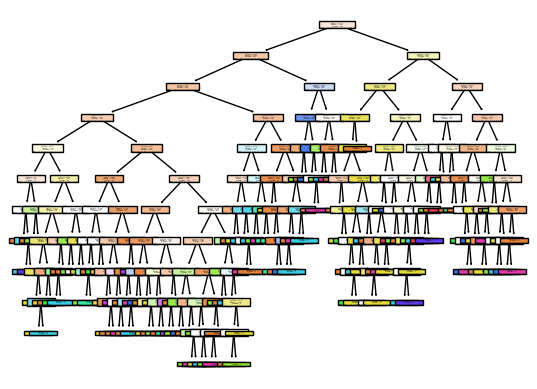

In [81]:
plot_tree(model, filled=True)

## A7

Construct a random forest classifier on your project data. Find the differences between the decision tree & random forest classifiers with the help of the performance metrics. 

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [84]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
pred = random_forest.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67       117
           1       0.79      0.76      0.77        54
           2       0.09      0.40      0.14         5
           3       0.00      0.00      0.00         0
           4       0.40      1.00      0.57         2
           5       0.00      0.00      0.00         0
           6       0.25      0.50      0.33         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.60       180
   macro avg       0.22      0.29      0.23       180
weighted avg       0.84      0.60      0.68       180

[[62 10 19  1  3  8  3  0  1  6  4]
 [ 4 41  2  2  0  3  0  2  0  0  0]
 [ 1  1  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0

C:\Users\Prabhav - Laptop HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prabhav - Laptop HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prabhav - Laptop HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  